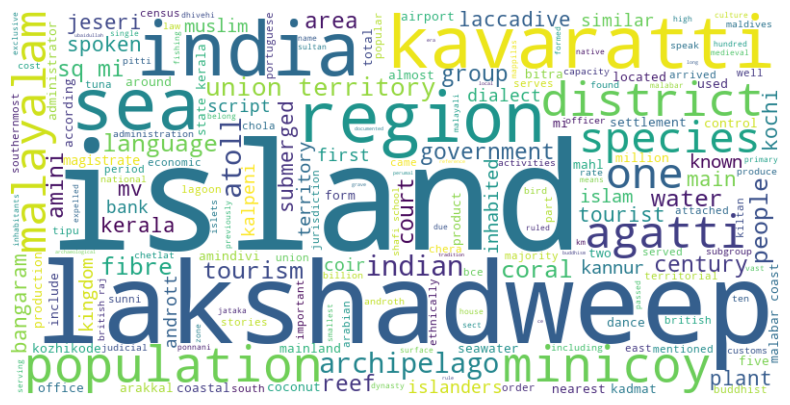

In [1]:
import requests
from bs4 import BeautifulSoup
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

def get_wikipedia_text(url):
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')
    paragraphs = soup.find_all('p')
    text = ' '.join([p.get_text() for p in paragraphs])
    return text

def process_text(text):
    stop_words = set(stopwords.words('english'))
    words = word_tokenize(text)
    filtered_words = [word.lower() for word in words if word.isalpha() and word.lower() not in stop_words]
    return ' '.join(filtered_words)

def generate_word_cloud(text):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

def main():
    wikipedia_url = 'https://en.wikipedia.org/wiki/Lakshadweep'
    wikipedia_text = get_wikipedia_text(wikipedia_url)
    processed_text = process_text(wikipedia_text)
    generate_word_cloud(processed_text)

if __name__ == "__main__":
    main()
